2025-11-02 21:53:49,131 INFO: Initializing external client
2025-11-02 21:53:49,132 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-02 21:53:51,759 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1271981
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.65s) 


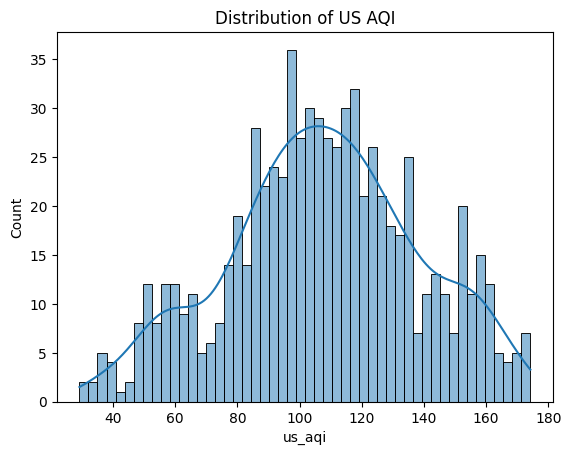

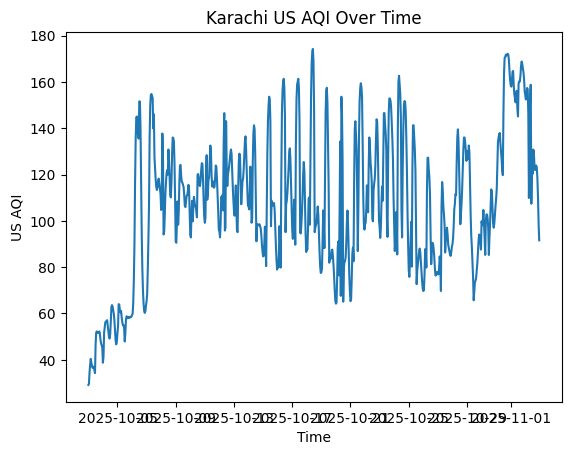

In [1]:
import os
import hopsworks
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

# Connect to Hopsworks
project = hopsworks.login(
    api_key_value=os.getenv("HOPSWORKS_API_KEY"),
    project=os.getenv("HOPSWORKS_PROJECT")
)
fs = project.get_feature_store()

# Load your computed US AQI feature group
fg = fs.get_feature_group("karachi_aqi_us", version=1)
df = fg.read()

# Ensure datetime
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

# Simple plots
sns.histplot(df['us_aqi'], bins=50, kde=True)
plt.title("Distribution of US AQI")
plt.show()

plt.plot(df['time'], df['us_aqi'])
plt.title("Karachi US AQI Over Time")
plt.xlabel("Time")
plt.ylabel("US AQI")
plt.show()


In [1]:
import pandas as pd
import hopsworks
import os
from dotenv import load_dotenv

load_dotenv()
project = hopsworks.login(
    api_key_value=os.getenv("HOPSWORKS_API_KEY"),
    project=os.getenv("HOPSWORKS_PROJECT")
)
fs = project.get_feature_store()
df = fs.get_feature_group("karachi_aqi_us", version=1).read()

corr = df.corr(numeric_only=True)["us_aqi"].sort_values(ascending=False)
print(corr)


2025-11-02 22:08:06,131 INFO: Initializing external client
2025-11-02 22:08:06,131 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-02 22:08:08,861 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1271981
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.53s) 
us_aqi                  1.000000
aqi_pm25                0.706883
pm2_5                   0.695961
sulphur_dioxide         0.614433
aqi_pm10                0.517003
pm10                    0.453465
aqi_o3                  0.361763
nitrogen_dioxide        0.287475
carbon_monoxide         0.264651
ozone                   0.238079
temperature_2m          0.231704
wind_speed_10m         -0.294551
relative_humidity_2m   -0.384829
Name: us_aqi, dtype: float64


In [3]:
import os
import hopsworks
from dotenv import load_dotenv
import pandas as pd

# -----------------------------
# Load environment variables
# -----------------------------
load_dotenv()
HOPSWORKS_API_KEY = os.getenv("HOPSWORKS_API_KEY")
HOPSWORKS_PROJECT = os.getenv("HOPSWORKS_PROJECT")

# Connect to Hopsworks
project = hopsworks.login(api_key_value=HOPSWORKS_API_KEY, project=HOPSWORKS_PROJECT)
fs = project.get_feature_store()

# Load the AQI feature group
fg = fs.get_feature_group("karachi_aqi_us", version=1)
df = fg.read()

# Get the latest row
latest_row = df.sort_values("time").tail(1)
print("🌟 Latest AQI row appended:")
print(latest_row)


2025-11-03 19:12:39,471 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-11-03 19:12:39,658 INFO: Initializing external client
2025-11-03 19:12:39,659 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-03 19:12:42,062 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1271981
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.51s) 
🌟 Latest AQI row appended:
                         time  pm10  pm2_5  carbon_monoxide  nitrogen_dioxide  \
744 2025-11-03 23:00:00+00:00  39.8   24.0            646.0              10.7   

     sulphur_dioxide  ozone  temperature_2m  relative_humidity_2m  \
744              7.0   59.0            23.1                    94   

     wind_speed_10m   aqi_pm25   aqi_pm10     aqi_o3     us_aqi aqi_category  
744             6.7  76.025751  36.851852  27.314815  76.025751     Moderate  
